*COMPRENSION DE LOS DATOS*

Definición de calidad de datos:

La calidad de los datos se refiere a aquella información generada en los procesos que cumplan con los parametros de integridad, validez y consistencia, esto debe ser validado y medido para garantizar el control de los datos, y poder levantar incidencias para mejoras en el proceso de generación de la información.

Donde:

- Integridad hace referencia a que estos datos una vez generados no sean manipulados y contengan toda la información necesaria, de acuerdo a los criterios del proceso.

- Validez o exactitud, se define como el cumplimiento de parámetros pre establecidos sobre características especificas de un proceso o información.

- Y, consistencia de la información evitando incompatibilidad entre distintos contextos.

Alcance de la evaluación:

Para este proyecto se define como alcance la validación de los datasets mencionados al inicio de este documento.

Se centrará en evaluar cada dataset considerando cada uno de los parámetros que fueron definidos en la calidad de los datos:

- Integridad: ¿Faltan datos obligatorios o valores clave?

- Validez: ¿Los valores cumplen con formatos y reglas definidas (ej., números en rangos aceptables)?

- Consistencia: ¿Los datos son uniformes entre datasets relacionados?

Para esto se utilizará python como lenguaje de programación y las librerías que posee (pandas, numpy, matplotlib, otros)

Datasets a evaluar:

datos_creditos.csv: exactitud, consistencia, validez.

- Información de solicitudes de crédito (edad, importe, tasas, estado del crédito).

datos_nuevos.csv: integridad, consistencia.

- Información más reciente sobre clientes y su relación con la entidad.

datos_tarjetas.csv: consistencia, validez.

- Detalles de clientes con tarjetas de crédito (antigüedad, límite, nivel educativo).

In [403]:
#Agregando librerias necesarias para la limpieza y extracción
import pandas as pd
import numpy as np
import seaborn as sns

Paso 1: Preparación

Separar columnas: 

Procesar los archivos delimitados por ; para transformarlos en un formato tabular correcto.
Exploración inicial: Obtener perfiles de los datos (tipos de datos, cantidad de valores nulos, valores únicos, etc.).

In [404]:
#Llamando los datasets para su evaluación

datos_creditos = pd.read_csv("C:/Users/Asus/OneDrive/Documentos/GitHub/actividadPractica/data/raw/datos_creditos.csv", sep=";")
datos_nuevos = pd.read_csv("C:/Users/Asus/OneDrive/Documentos/GitHub/actividadPractica/data/raw/datos_nuevos.csv", sep=";")
datos_tarjetas = pd.read_csv("C:/Users/Asus/OneDrive/Documentos/GitHub/actividadPractica/data/raw/datos_tarjetas.csv", sep=";")

Validación de la calidad de los datos

Validar formatos:

- Revisar que los datos cumplan con las reglas definidas (ej.: fechas válidas, números positivos).
Ejemplo: Las tasas de interés deben ser números entre 0 y 100.

Buscar valores faltantes:

- Detectar campos vacíos o nulos en atributos clave (ej.: edad, importe solicitado, límites de crédito).

Detección de duplicados:

- Identificar registros duplicados usando claves únicas como id_cliente.

Revisar consistencia interna:

- Verificar relaciones entre columnas dentro de un dataset.
Ejemplo: La suma de subtotales debe coincidir con el total de una transacción.

Evaluar consistencia externa:

- Comparar los tres datasets para detectar discrepancias.
Ejemplo: Un cliente en datos_creditos.csv debería aparecer con el mismo ID y atributos básicos en datos_tarjetas.csv.

Calcular métricas:

- Proporción de datos válidos.

- Porcentaje de duplicados.

- Porcentaje de datos completos.

- Indicadores específicos por dimensión.

DATASET DATOS DE TARJETAS

In [405]:
#Validando formatos
datos_tarjetas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id_cliente           10127 non-null  float64
 1   antiguedad_cliente   10127 non-null  float64
 2   estado_civil         10127 non-null  object 
 3   estado_cliente       10127 non-null  object 
 4   gastos_ult_12m       10127 non-null  float64
 5   genero               10127 non-null  object 
 6   limite_credito_tc    10127 non-null  float64
 7   nivel_educativo      10127 non-null  object 
 8   nivel_tarjeta        10127 non-null  object 
 9   operaciones_ult_12m  10127 non-null  float64
 10  personas_a_cargo     10127 non-null  float64
dtypes: float64(6), object(5)
memory usage: 870.4+ KB


In [406]:
datos_tarjetas.head()

,id_cliente,antiguedad_cliente,estado_civil,estado_cliente,gastos_ult_12m,genero,limite_credito_tc,nivel_educativo,nivel_tarjeta,operaciones_ult_12m,personas_a_cargo
0,713061558.0,36.0,CASADO,ACTIVO,1088.0,M,4010.0,UNIVERSITARIO_COMPLETO,Blue,24.0,2.0
1,768805383.0,39.0,CASADO,ACTIVO,1144.0,M,12691.0,SECUNDARIO_COMPLETO,Blue,42.0,3.0
2,818770008.0,44.0,SOLTERO,ACTIVO,1291.0,F,8256.0,UNIVERSITARIO_COMPLETO,Blue,33.0,5.0
3,713982108.0,36.0,CASADO,ACTIVO,1887.0,M,3418.0,UNIVERSITARIO_COMPLETO,Blue,20.0,3.0
4,710821833.0,54.0,CASADO,ACTIVO,1314.0,M,9095.0,DESCONOCIDO,Blue,26.0,1.0


DATASET DATOS DE CREDITOS

In [407]:
datos_creditos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id_cliente           10127 non-null  float64
 1   edad                 10127 non-null  int64  
 2   importe_solicitado   10127 non-null  int64  
 3   duracion_credito     10127 non-null  int64  
 4   antiguedad_empleado  9790 non-null   float64
 5   situacion_vivienda   10127 non-null  object 
 6   ingresos             10127 non-null  int64  
 7   objetivo_credito     10127 non-null  object 
 8   pct_ingreso          10127 non-null  float64
 9   tasa_interes         9215 non-null   float64
 10  estado_credito       10127 non-null  int64  
 11  falta_pago           10127 non-null  object 
dtypes: float64(4), int64(5), object(3)
memory usage: 949.5+ KB


In [408]:
datos_tarjetas.head()

,id_cliente,antiguedad_cliente,estado_civil,estado_cliente,gastos_ult_12m,genero,limite_credito_tc,nivel_educativo,nivel_tarjeta,operaciones_ult_12m,personas_a_cargo
0,713061558.0,36.0,CASADO,ACTIVO,1088.0,M,4010.0,UNIVERSITARIO_COMPLETO,Blue,24.0,2.0
1,768805383.0,39.0,CASADO,ACTIVO,1144.0,M,12691.0,SECUNDARIO_COMPLETO,Blue,42.0,3.0
2,818770008.0,44.0,SOLTERO,ACTIVO,1291.0,F,8256.0,UNIVERSITARIO_COMPLETO,Blue,33.0,5.0
3,713982108.0,36.0,CASADO,ACTIVO,1887.0,M,3418.0,UNIVERSITARIO_COMPLETO,Blue,20.0,3.0
4,710821833.0,54.0,CASADO,ACTIVO,1314.0,M,9095.0,DESCONOCIDO,Blue,26.0,1.0


DATASET DATOS DE CREDITOS

In [409]:
datos_nuevos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id_cliente           112 non-null    int64  
 1   edad                 112 non-null    int64  
 2   importe_solicitado   112 non-null    int64  
 3   duracion_credito     112 non-null    int64  
 4   antiguedad_empleado  112 non-null    float64
 5   situacion_vivienda   112 non-null    object 
 6   ingresos             112 non-null    int64  
 7   objetivo_credito     112 non-null    object 
 8   pct_ingreso          112 non-null    float64
 9   tasa_interes         107 non-null    float64
 10  estado_credito       112 non-null    int64  
 11  antiguedad_cliente   112 non-null    int64  
 12  estado_civil         112 non-null    object 
 13  estado_cliente       112 non-null    object 
 14  gastos_ult_12m       112 non-null    float64
 15  genero               112 non-null    obj

In [410]:
datos_tarjetas.head()

,id_cliente,antiguedad_cliente,estado_civil,estado_cliente,gastos_ult_12m,genero,limite_credito_tc,nivel_educativo,nivel_tarjeta,operaciones_ult_12m,personas_a_cargo
0,713061558.0,36.0,CASADO,ACTIVO,1088.0,M,4010.0,UNIVERSITARIO_COMPLETO,Blue,24.0,2.0
1,768805383.0,39.0,CASADO,ACTIVO,1144.0,M,12691.0,SECUNDARIO_COMPLETO,Blue,42.0,3.0
2,818770008.0,44.0,SOLTERO,ACTIVO,1291.0,F,8256.0,UNIVERSITARIO_COMPLETO,Blue,33.0,5.0
3,713982108.0,36.0,CASADO,ACTIVO,1887.0,M,3418.0,UNIVERSITARIO_COMPLETO,Blue,20.0,3.0
4,710821833.0,54.0,CASADO,ACTIVO,1314.0,M,9095.0,DESCONOCIDO,Blue,26.0,1.0


Generar reportes con:

- Problemas detectados (por dataset y dimensión).

- Estadísticas relevantes (valores faltantes, duplicados, inconsistencias).

DATOS TARJETAS

Valores nulos = 0 %

In [411]:
#Valores faltantes
for column in datos_tarjetas:
    nulos_columna = datos_tarjetas[column].isnull().sum()
    print(f"Valores nulos en {column}: {nulos_columna}")

Valores nulos en id_cliente: 0
Valores nulos en antiguedad_cliente: 0
Valores nulos en estado_civil: 0
Valores nulos en estado_cliente: 0
Valores nulos en gastos_ult_12m: 0
Valores nulos en genero: 0
Valores nulos en limite_credito_tc: 0
Valores nulos en nivel_educativo: 0
Valores nulos en nivel_tarjeta: 0
Valores nulos en operaciones_ult_12m: 0
Valores nulos en personas_a_cargo: 0


Valores duplicados = 0 %

In [412]:
#Valores duplicados
for column in datos_tarjetas:
    num_duplicados = datos_tarjetas.duplicated().sum()
    print(f"Número de filas duplicadas en {column}: {num_duplicados}")

Número de filas duplicadas en id_cliente: 0
Número de filas duplicadas en antiguedad_cliente: 0
Número de filas duplicadas en estado_civil: 0
Número de filas duplicadas en estado_cliente: 0
Número de filas duplicadas en gastos_ult_12m: 0
Número de filas duplicadas en genero: 0
Número de filas duplicadas en limite_credito_tc: 0
Número de filas duplicadas en nivel_educativo: 0
Número de filas duplicadas en nivel_tarjeta: 0
Número de filas duplicadas en operaciones_ult_12m: 0
Número de filas duplicadas en personas_a_cargo: 0


Consistencia de datos: OK

In [413]:
#Consistencia de los datos numéricos
for column in datos_tarjetas.select_dtypes(include=['number']):
    if column != "id_cliente" :
        print(column)
        print(datos_tarjetas[column].describe())
        print("\n")

antiguedad_cliente
count    10127.000000
mean        35.928409
std          7.986416
min         13.000000
25%         31.000000
50%         36.000000
75%         40.000000
max         56.000000
Name: antiguedad_cliente, dtype: float64


gastos_ult_12m
count    10127.000000
mean      4404.086304
std       3397.129254
min        510.000000
25%       2155.500000
50%       3899.000000
75%       4741.000000
max      18484.000000
Name: gastos_ult_12m, dtype: float64


limite_credito_tc
count    10127.000000
mean      8631.953698
std       9088.776650
min       1438.300000
25%       2555.000000
50%       4549.000000
75%      11067.500000
max      34516.000000
Name: limite_credito_tc, dtype: float64


operaciones_ult_12m
count    10127.000000
mean        64.858695
std         23.472570
min         10.000000
25%         45.000000
50%         67.000000
75%         81.000000
max        139.000000
Name: operaciones_ult_12m, dtype: float64


personas_a_cargo
count    10127.000000
mean         2.34

In [414]:
#Consistencia de los datos categoricos
for column in datos_tarjetas.select_dtypes(exclude=['number']):
    if column != "id_cliente" :
        print(column)
        print(datos_tarjetas[column].unique())
        print("\n")

estado_civil
['CASADO' 'SOLTERO' 'DESCONOCIDO' 'DIVORCIADO']


estado_cliente
['ACTIVO' 'PASIVO']


genero
['M' 'F']


nivel_educativo
['UNIVERSITARIO_COMPLETO' 'SECUNDARIO_COMPLETO' 'DESCONOCIDO'
 'UNIVERSITARIO_INCOMPLETO' 'POSGRADO_INCOMPLETO' 'POSGRADO_COMPLETO']


nivel_tarjeta
['Blue' 'Gold' 'Silver' 'Platinum']




DATOS DE CREDITOS

In [415]:
#Valores faltantes
for column in datos_creditos:
    nulos_columna = datos_creditos[column].isnull().sum()
    print(f"Valores nulos en {column}: {nulos_columna}")

Valores nulos en id_cliente: 0
Valores nulos en edad: 0
Valores nulos en importe_solicitado: 0
Valores nulos en duracion_credito: 0
Valores nulos en antiguedad_empleado: 337
Valores nulos en situacion_vivienda: 0
Valores nulos en ingresos: 0
Valores nulos en objetivo_credito: 0
Valores nulos en pct_ingreso: 0
Valores nulos en tasa_interes: 912
Valores nulos en estado_credito: 0
Valores nulos en falta_pago: 0


3% de valores nulos en antiguedad_empleado

9% de valores nulos en tasa_interes

In [416]:
#Trabajando sobre datos nulos en la columna de antiguedad_empleado
list_nulos = ["antiguedad_empleado", "tasa_interes"]
for column in list_nulos:
    nulos_columna = datos_creditos[column].isnull().sum()
    porcentaje = round(nulos_columna/(datos_creditos.shape[0]),2)*100
    print(f"Porcentaje de valores nulos en {column}: {porcentaje}")


Porcentaje de valores nulos en antiguedad_empleado: 3.0
Porcentaje de valores nulos en tasa_interes: 9.0


Datos duplicados: 0 %

In [417]:
#Valores duplicados
for column in datos_creditos:
    num_duplicados = datos_creditos.duplicated().sum()
    print(f"Número de filas duplicadas en {column}: {num_duplicados}")

Número de filas duplicadas en id_cliente: 0
Número de filas duplicadas en edad: 0
Número de filas duplicadas en importe_solicitado: 0
Número de filas duplicadas en duracion_credito: 0
Número de filas duplicadas en antiguedad_empleado: 0
Número de filas duplicadas en situacion_vivienda: 0
Número de filas duplicadas en ingresos: 0
Número de filas duplicadas en objetivo_credito: 0
Número de filas duplicadas en pct_ingreso: 0
Número de filas duplicadas en tasa_interes: 0
Número de filas duplicadas en estado_credito: 0
Número de filas duplicadas en falta_pago: 0


In [418]:
#Consistencia de los datos numéricos
for column in datos_creditos.select_dtypes(include=['number']):
    if column != "id_cliente" :
        print(column)
        print(datos_creditos[column].describe())
        print("\n")

edad
count    10127.000000
mean        23.572726
std          2.664686
min         20.000000
25%         22.000000
50%         23.000000
75%         25.000000
max        144.000000
Name: edad, dtype: float64


importe_solicitado
count    10127.000000
mean      8138.733090
std       5740.106782
min        500.000000
25%       4425.000000
50%       6500.000000
75%      10000.000000
max      35000.000000
Name: importe_solicitado, dtype: float64


duracion_credito
count    10127.000000
mean         2.995556
std          0.817230
min          2.000000
25%          2.000000
50%          3.000000
75%          4.000000
max          4.000000
Name: duracion_credito, dtype: float64


antiguedad_empleado
count    9790.000000
mean        3.938509
std         3.320165
min         0.000000
25%         2.000000
50%         4.000000
75%         6.000000
max       123.000000
Name: antiguedad_empleado, dtype: float64


ingresos
count     10127.000000
mean      50381.897600
std       28785.536935
min     

In [419]:
#Se observan datos inconsistentes en las columnas de edad y de antiguedad superando valores de los 100 años
datos_creditos[datos_creditos["edad"] > 100]

,id_cliente,edad,importe_solicitado,duracion_credito,antiguedad_empleado,situacion_vivienda,ingresos,objetivo_credito,pct_ingreso,tasa_interes,estado_credito,falta_pago
81,715623483.0,144,4800,3,4.0,ALQUILER,250000,INVERSIONES,0.02,13.57,0,N
183,815500983.0,144,6000,2,4.0,HIPOTECA,200000,EDUCACIÓN,0.03,11.86,0,N
575,717956283.0,123,20400,3,2.0,ALQUILER,80004,EDUCACIÓN,0.25,10.25,0,N
747,712881483.0,123,20000,4,7.0,ALQUILER,78000,INVERSIONES,0.26,NaN,0,N


<Axes: >

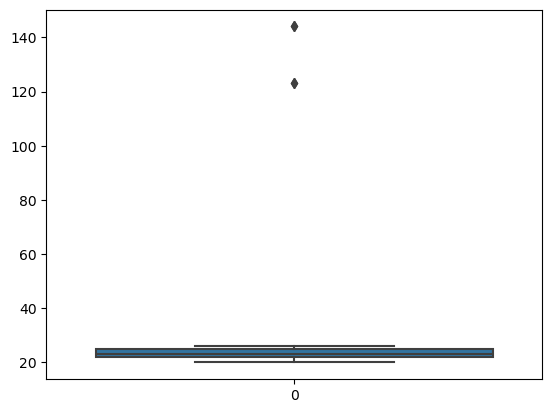

In [420]:
sns.boxplot(datos_creditos["edad"])

<Axes: >

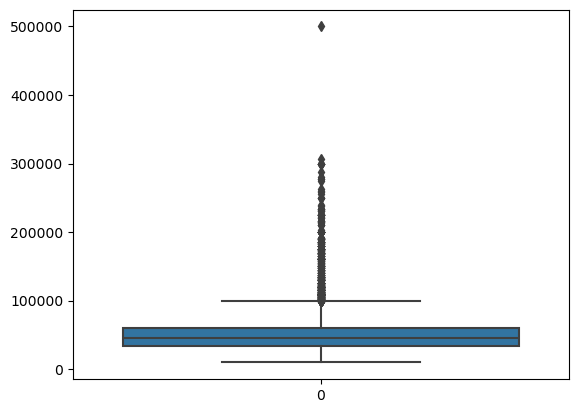

In [421]:
#Se observa un valor de 500000 de ingresos, por lo que se va a visualizar la distribución por medio de un grafico boxplot

sns.boxplot(datos_creditos["ingresos"])

In [422]:
datos_creditos[datos_creditos["ingresos"] > 350000]

,id_cliente,edad,importe_solicitado,duracion_credito,antiguedad_empleado,situacion_vivienda,ingresos,objetivo_credito,pct_ingreso,tasa_interes,estado_credito,falta_pago
15,714885258.0,23,30000,3,7.0,HIPOTECA,500000,PAGO_DEUDAS,0.06,10.65,0,N


In [423]:
#Consistencia de los datos categoricos
for column in datos_creditos.select_dtypes(exclude=['number']):
    if column != "id_cliente" :
        print(column)
        print(datos_creditos[column].unique())
        print("\n")

situacion_vivienda
['ALQUILER' 'PROPIA' 'HIPOTECA' 'OTROS']


objetivo_credito
['PERSONAL' 'EDUCACIÓN' 'SALUD' 'INVERSIONES' 'MEJORAS_HOGAR'
 'PAGO_DEUDAS']


falta_pago
['Y' 'N']




DATOS NUEVOS

In [424]:
#Valores faltantes
for column in datos_nuevos:
    nulos_columna = datos_nuevos[column].isnull().sum()
    print(f"Valores nulos en {column}: {nulos_columna}")

Valores nulos en id_cliente: 0
Valores nulos en edad: 0
Valores nulos en importe_solicitado: 0
Valores nulos en duracion_credito: 0
Valores nulos en antiguedad_empleado: 0
Valores nulos en situacion_vivienda: 0
Valores nulos en ingresos: 0
Valores nulos en objetivo_credito: 0
Valores nulos en pct_ingreso: 0
Valores nulos en tasa_interes: 5
Valores nulos en estado_credito: 0
Valores nulos en antiguedad_cliente: 0
Valores nulos en estado_civil: 0
Valores nulos en estado_cliente: 0
Valores nulos en gastos_ult_12m: 0
Valores nulos en genero: 0
Valores nulos en limite_credito_tc: 0
Valores nulos en nivel_educativo: 0
Valores nulos en nivel_tarjeta: 0
Valores nulos en operaciones_ult_12m: 0
Valores nulos en personas_a_cargo: 0


In [425]:
list_nulos = ["tasa_interes"]
for column in list_nulos:
    nulos_columna = datos_nuevos[column].isnull().sum()
    porcentaje = round(nulos_columna/(datos_nuevos.shape[0]),2)*100
    print(f"Porcentaje de valores nulos en {column}: {porcentaje}")

Porcentaje de valores nulos en tasa_interes: 4.0


Clasificar problemas:

- Urgentes: Impactan directamente análisis o decisiones (duplicados, errores críticos).

    Datos nulos
    Transformación de tipo de datos

- Importantes: Reducen la efectividad de procesos secundarios (falta de valores no obligatorios).

    Datos fuera de rango. (edad)

- Menores: Problemas que no afectan operaciones inmediatas.

**PREPARACIÓN DE LOS DATOS**


Selección de datos

Datos fuera de rango establecido

Eliminación de datos de edad mayores a 60 años.

Estos datos no serán considerados por que los datos de edad son anomalos, y comparando los datos de edad con los datos de edad empleado no mantienen correlación.

In [426]:
#Se agrega filtro para no considerar edades mayores a 60 años en el análisis
datos_creditos = datos_creditos[datos_creditos['edad'] < 60]

A pesar de que el valor de 500000 de ingreso es el unico que sobresale del dataset de las tarjetas de créditos se va a mantener, porque se puede dar el caso en el que el cliente tenga buenas posibilidades económicas

Limpieza de datos

Corregir valores inválidos y remover duplicados.

Transformación de tipo de datos

In [427]:
#El id de cliente se encuentra almacenado en formato float, por lo que se optara por convertir los datos en enteros.
datos_tarjetas["id_cliente"] = datos_tarjetas["id_cliente"].astype("int64")
#operaciones_ult_12me se encuentra almacenado en formato float, por lo que se optara por convertir los datos en enteros.
datos_tarjetas["operaciones_ult_12m"] = datos_tarjetas["operaciones_ult_12m"].astype("int64")
#personas_a_cargo se encuentra almacenado en formato float, por lo que se optara por convertir los datos en enteros.
datos_tarjetas["personas_a_cargo"] = datos_tarjetas["personas_a_cargo"].astype("int64")

DATOS DE CREDITOS

Eliminación de valores nulos

In [428]:
#Se van a eliminar las filas con valores nulos.

datos_creditos = datos_creditos.dropna(axis = 0)

list_nulos = ["tasa_interes"]
for column in list_nulos:
    nulos_columna = datos_creditos[column].isnull().sum()
    porcentaje = round(nulos_columna/(datos_creditos.shape[0]),2) * 100
    print(f"Porcentaje de valores nulos en {column}: {porcentaje}")

Porcentaje de valores nulos en tasa_interes: 0.0


Transformación de tipos de datos

In [429]:
#El id de cliente se encuentra almacenado en formato float, por lo que se optara por convertir los datos en enteros.
datos_creditos["id_cliente"] = datos_creditos["id_cliente"].astype("int64")

DATOS NUEVOS

Eliminando valores nulos

In [430]:
#Se van a eliminar las filas con valores nulos.
datos_nuevos = datos_nuevos.dropna(axis = 0)

list_nulos = ["tasa_interes"]
for column in list_nulos:
    nulos_columna = datos_nuevos[column].isnull().sum()
    porcentaje = round(nulos_columna/(datos_nuevos.shape[0]),2)*100
    print(f"Porcentaje de valores nulos en {column}: {porcentaje}")

Porcentaje de valores nulos en tasa_interes: 0.0


**INTEGRACIÓN DE DATOS**

In [431]:
datos_tarjetas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id_cliente           10127 non-null  int64  
 1   antiguedad_cliente   10127 non-null  float64
 2   estado_civil         10127 non-null  object 
 3   estado_cliente       10127 non-null  object 
 4   gastos_ult_12m       10127 non-null  float64
 5   genero               10127 non-null  object 
 6   limite_credito_tc    10127 non-null  float64
 7   nivel_educativo      10127 non-null  object 
 8   nivel_tarjeta        10127 non-null  object 
 9   operaciones_ult_12m  10127 non-null  int64  
 10  personas_a_cargo     10127 non-null  int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 870.4+ KB


In [432]:
datos_creditos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8899 entries, 0 to 10126
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id_cliente           8899 non-null   int64  
 1   edad                 8899 non-null   int64  
 2   importe_solicitado   8899 non-null   int64  
 3   duracion_credito     8899 non-null   int64  
 4   antiguedad_empleado  8899 non-null   float64
 5   situacion_vivienda   8899 non-null   object 
 6   ingresos             8899 non-null   int64  
 7   objetivo_credito     8899 non-null   object 
 8   pct_ingreso          8899 non-null   float64
 9   tasa_interes         8899 non-null   float64
 10  estado_credito       8899 non-null   int64  
 11  falta_pago           8899 non-null   object 
dtypes: float64(3), int64(6), object(3)
memory usage: 903.8+ KB


In [433]:
datos_nuevos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 107 entries, 0 to 111
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id_cliente           107 non-null    int64  
 1   edad                 107 non-null    int64  
 2   importe_solicitado   107 non-null    int64  
 3   duracion_credito     107 non-null    int64  
 4   antiguedad_empleado  107 non-null    float64
 5   situacion_vivienda   107 non-null    object 
 6   ingresos             107 non-null    int64  
 7   objetivo_credito     107 non-null    object 
 8   pct_ingreso          107 non-null    float64
 9   tasa_interes         107 non-null    float64
 10  estado_credito       107 non-null    int64  
 11  antiguedad_cliente   107 non-null    int64  
 12  estado_civil         107 non-null    object 
 13  estado_cliente       107 non-null    object 
 14  gastos_ult_12m       107 non-null    float64
 15  genero               107 non-null    object 


In [434]:
datos_analisis = pd.merge( datos_tarjetas, datos_creditos, on='id_cliente', how='left')

In [435]:
datos_analisis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id_cliente           10127 non-null  int64  
 1   antiguedad_cliente   10127 non-null  float64
 2   estado_civil         10127 non-null  object 
 3   estado_cliente       10127 non-null  object 
 4   gastos_ult_12m       10127 non-null  float64
 5   genero               10127 non-null  object 
 6   limite_credito_tc    10127 non-null  float64
 7   nivel_educativo      10127 non-null  object 
 8   nivel_tarjeta        10127 non-null  object 
 9   operaciones_ult_12m  10127 non-null  int64  
 10  personas_a_cargo     10127 non-null  int64  
 11  edad                 8899 non-null   float64
 12  importe_solicitado   8899 non-null   float64
 13  duracion_credito     8899 non-null   float64
 14  antiguedad_empleado  8899 non-null   float64
 15  situacion_vivienda   8899 non-null  

In [436]:
datos_analisis = datos_analisis.dropna(axis = 0)


DATASETS PROCESADOS

In [437]:
datos_analisis.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8899 entries, 0 to 10126
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id_cliente           8899 non-null   int64  
 1   antiguedad_cliente   8899 non-null   float64
 2   estado_civil         8899 non-null   object 
 3   estado_cliente       8899 non-null   object 
 4   gastos_ult_12m       8899 non-null   float64
 5   genero               8899 non-null   object 
 6   limite_credito_tc    8899 non-null   float64
 7   nivel_educativo      8899 non-null   object 
 8   nivel_tarjeta        8899 non-null   object 
 9   operaciones_ult_12m  8899 non-null   int64  
 10  personas_a_cargo     8899 non-null   int64  
 11  edad                 8899 non-null   float64
 12  importe_solicitado   8899 non-null   float64
 13  duracion_credito     8899 non-null   float64
 14  antiguedad_empleado  8899 non-null   float64
 15  situacion_vivienda   8899 non-null   objec

In [438]:
datos_nuevos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 107 entries, 0 to 111
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id_cliente           107 non-null    int64  
 1   edad                 107 non-null    int64  
 2   importe_solicitado   107 non-null    int64  
 3   duracion_credito     107 non-null    int64  
 4   antiguedad_empleado  107 non-null    float64
 5   situacion_vivienda   107 non-null    object 
 6   ingresos             107 non-null    int64  
 7   objetivo_credito     107 non-null    object 
 8   pct_ingreso          107 non-null    float64
 9   tasa_interes         107 non-null    float64
 10  estado_credito       107 non-null    int64  
 11  antiguedad_cliente   107 non-null    int64  
 12  estado_civil         107 non-null    object 
 13  estado_cliente       107 non-null    object 
 14  gastos_ult_12m       107 non-null    float64
 15  genero               107 non-null    object 


CONSTRUCCION DE DATOS

Se convertiran todos los datos a variables para el proceso de modelado

In [439]:
from sklearn.preprocessing import LabelEncoder

In [440]:
columns_to_label_encoder = ["nivel_educativo" , "nivel_tarjeta"]
columns_to_Onehot_encoding = ["estado_civil", "estado_cliente","genero","situacion_vivienda","objetivo_credito"]

In [441]:
#Aplicación de labelEncoder y cambio a variables binaras para la columna objetivo

label_encoder = LabelEncoder()

for column in columns_to_label_encoder:
    datos_analisis[column] = label_encoder.fit_transform(datos_analisis[column])

datos_analisis['falta_pago'] = datos_analisis['falta_pago'].map({'N': 0, 'Y': 1})

In [442]:
datos_analisis.head()

,id_cliente,antiguedad_cliente,estado_civil,estado_cliente,gastos_ult_12m,genero,limite_credito_tc,nivel_educativo,nivel_tarjeta,operaciones_ult_12m,...,importe_solicitado,duracion_credito,antiguedad_empleado,situacion_vivienda,ingresos,objetivo_credito,pct_ingreso,tasa_interes,estado_credito,falta_pago
0,713061558,36.0,CASADO,ACTIVO,1088.0,M,4010.0,4,0,24,...,35000.0,3.0,123.0,ALQUILER,59000.0,PERSONAL,0.59,16.02,1.0,1
1,768805383,39.0,CASADO,ACTIVO,1144.0,M,12691.0,3,0,42,...,1000.0,2.0,5.0,PROPIA,9600.0,EDUCACIÓN,0.10,11.14,0.0,0
2,818770008,44.0,SOLTERO,ACTIVO,1291.0,F,8256.0,4,0,33,...,5500.0,3.0,1.0,HIPOTECA,9600.0,SALUD,0.57,12.87,1.0,0
3,713982108,36.0,CASADO,ACTIVO,1887.0,M,3418.0,4,0,20,...,35000.0,2.0,4.0,ALQUILER,65500.0,SALUD,0.53,15.23,1.0,0
4,710821833,54.0,CASADO,ACTIVO,1314.0,M,9095.0,0,0,26,...,35000.0,4.0,8.0,ALQUILER,54400.0,SALUD,0.55,14.27,1.0,1


In [443]:
datos_analisis = pd.get_dummies(datos_analisis, columns=columns_to_Onehot_encoding, drop_first=True)
datos_analisis.head()

,id_cliente,antiguedad_cliente,gastos_ult_12m,limite_credito_tc,nivel_educativo,nivel_tarjeta,operaciones_ult_12m,personas_a_cargo,edad,importe_solicitado,...,estado_cliente_PASIVO,genero_M,situacion_vivienda_HIPOTECA,situacion_vivienda_OTROS,situacion_vivienda_PROPIA,objetivo_credito_INVERSIONES,objetivo_credito_MEJORAS_HOGAR,objetivo_credito_PAGO_DEUDAS,objetivo_credito_PERSONAL,objetivo_credito_SALUD
0,713061558,36.0,1088.0,4010.0,4,0,24,2,22.0,35000.0,...,False,True,False,False,False,False,False,False,True,False
1,768805383,39.0,1144.0,12691.0,3,0,42,3,21.0,1000.0,...,False,True,False,False,True,False,False,False,False,False
2,818770008,44.0,1291.0,8256.0,4,0,33,5,25.0,5500.0,...,False,False,True,False,False,False,False,False,False,True
3,713982108,36.0,1887.0,3418.0,4,0,20,3,23.0,35000.0,...,False,True,False,False,False,False,False,False,False,True
4,710821833,54.0,1314.0,9095.0,0,0,26,1,24.0,35000.0,...,False,True,False,False,False,False,False,False,False,True


In [444]:
datos_analisis.info()
datos_originales_creditos = datos_analisis

<class 'pandas.core.frame.DataFrame'>
Index: 8899 entries, 0 to 10126
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id_cliente                      8899 non-null   int64  
 1   antiguedad_cliente              8899 non-null   float64
 2   gastos_ult_12m                  8899 non-null   float64
 3   limite_credito_tc               8899 non-null   float64
 4   nivel_educativo                 8899 non-null   int32  
 5   nivel_tarjeta                   8899 non-null   int32  
 6   operaciones_ult_12m             8899 non-null   int64  
 7   personas_a_cargo                8899 non-null   int64  
 8   edad                            8899 non-null   float64
 9   importe_solicitado              8899 non-null   float64
 10  duracion_credito                8899 non-null   float64
 11  antiguedad_empleado             8899 non-null   float64
 12  ingresos                        8899 n

In [445]:
#Se elimina columna ID
datos_analisis.drop(columns= ["id_cliente"], inplace=True)
datos_analisis.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8899 entries, 0 to 10126
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   antiguedad_cliente              8899 non-null   float64
 1   gastos_ult_12m                  8899 non-null   float64
 2   limite_credito_tc               8899 non-null   float64
 3   nivel_educativo                 8899 non-null   int32  
 4   nivel_tarjeta                   8899 non-null   int32  
 5   operaciones_ult_12m             8899 non-null   int64  
 6   personas_a_cargo                8899 non-null   int64  
 7   edad                            8899 non-null   float64
 8   importe_solicitado              8899 non-null   float64
 9   duracion_credito                8899 non-null   float64
 10  antiguedad_empleado             8899 non-null   float64
 11  ingresos                        8899 non-null   float64
 12  pct_ingreso                     8899 n

In [446]:
datos_analisis.columns

Index(['antiguedad_cliente', 'gastos_ult_12m', 'limite_credito_tc',
       'nivel_educativo', 'nivel_tarjeta', 'operaciones_ult_12m',
       'personas_a_cargo', 'edad', 'importe_solicitado', 'duracion_credito',
       'antiguedad_empleado', 'ingresos', 'pct_ingreso', 'tasa_interes',
       'estado_credito', 'falta_pago', 'estado_civil_DESCONOCIDO',
       'estado_civil_DIVORCIADO', 'estado_civil_SOLTERO',
       'estado_cliente_PASIVO', 'genero_M', 'situacion_vivienda_HIPOTECA',
       'situacion_vivienda_OTROS', 'situacion_vivienda_PROPIA',
       'objetivo_credito_INVERSIONES', 'objetivo_credito_MEJORAS_HOGAR',
       'objetivo_credito_PAGO_DEUDAS', 'objetivo_credito_PERSONAL',
       'objetivo_credito_SALUD'],
      dtype='object')

Transformando los datos nuevos, para predicciones

In [447]:
#Aplicación de labelEncoder y cambio a variables binaras para la columna objetivo
datos_originales = datos_nuevos
label_encoder = LabelEncoder()

for column in columns_to_label_encoder:
    datos_nuevos[column] = label_encoder.fit_transform(datos_nuevos[column])

datos_nuevos = pd.get_dummies(datos_nuevos, columns=columns_to_Onehot_encoding, drop_first=True)
datos_nuevos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 107 entries, 0 to 111
Data columns (total 28 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id_cliente                      107 non-null    int64  
 1   edad                            107 non-null    int64  
 2   importe_solicitado              107 non-null    int64  
 3   duracion_credito                107 non-null    int64  
 4   antiguedad_empleado             107 non-null    float64
 5   ingresos                        107 non-null    int64  
 6   pct_ingreso                     107 non-null    float64
 7   tasa_interes                    107 non-null    float64
 8   estado_credito                  107 non-null    int64  
 9   antiguedad_cliente              107 non-null    int64  
 10  gastos_ult_12m                  107 non-null    float64
 11  limite_credito_tc               107 non-null    float64
 12  nivel_educativo                 107 non-n

In [448]:
#Se agrega columna faltante: situacion_vivienda_OTROS

datos_nuevos['situacion_vivienda_OTROS'] = False
datos_nuevos.drop(columns= ["id_cliente"], inplace=True)
datos_nuevos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 107 entries, 0 to 111
Data columns (total 28 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   edad                            107 non-null    int64  
 1   importe_solicitado              107 non-null    int64  
 2   duracion_credito                107 non-null    int64  
 3   antiguedad_empleado             107 non-null    float64
 4   ingresos                        107 non-null    int64  
 5   pct_ingreso                     107 non-null    float64
 6   tasa_interes                    107 non-null    float64
 7   estado_credito                  107 non-null    int64  
 8   antiguedad_cliente              107 non-null    int64  
 9   gastos_ult_12m                  107 non-null    float64
 10  limite_credito_tc               107 non-null    float64
 11  nivel_educativo                 107 non-null    int32  
 12  nivel_tarjeta                   107 non-n

In [449]:
datos_nuevos = datos_nuevos.reindex(['antiguedad_cliente', 'gastos_ult_12m', 'limite_credito_tc',
       'nivel_educativo', 'nivel_tarjeta', 'operaciones_ult_12m',
       'personas_a_cargo', 'edad', 'importe_solicitado', 'duracion_credito',
       'antiguedad_empleado', 'ingresos', 'pct_ingreso', 'tasa_interes',
       'estado_credito', 'estado_civil_DESCONOCIDO',
       'estado_civil_DIVORCIADO', 'estado_civil_SOLTERO',
       'estado_cliente_PASIVO', 'genero_M', 'situacion_vivienda_HIPOTECA',
       'situacion_vivienda_OTROS', 'situacion_vivienda_PROPIA',
       'objetivo_credito_INVERSIONES', 'objetivo_credito_MEJORAS_HOGAR',
       'objetivo_credito_PAGO_DEUDAS', 'objetivo_credito_PERSONAL',
       'objetivo_credito_SALUD'], axis=1)
 
datos_nuevos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 107 entries, 0 to 111
Data columns (total 28 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   antiguedad_cliente              107 non-null    int64  
 1   gastos_ult_12m                  107 non-null    float64
 2   limite_credito_tc               107 non-null    float64
 3   nivel_educativo                 107 non-null    int32  
 4   nivel_tarjeta                   107 non-null    int32  
 5   operaciones_ult_12m             107 non-null    float64
 6   personas_a_cargo                107 non-null    float64
 7   edad                            107 non-null    int64  
 8   importe_solicitado              107 non-null    int64  
 9   duracion_credito                107 non-null    int64  
 10  antiguedad_empleado             107 non-null    float64
 11  ingresos                        107 non-null    int64  
 12  pct_ingreso                     107 non-n

Se guardan los datasets en la carpeta de processed

In [450]:
datos_nuevos.to_csv('C:/Users/Asus/OneDrive/Documentos/GitHub/actividadPractica/data/processed/datos_nuevos_encoding.csv', index=False)
datos_analisis.to_csv('C:/Users/Asus/OneDrive/Documentos/GitHub/actividadPractica/data/processed/datos_creditos_encoding.csv', index=False)
datos_originales.to_csv('C:/Users/Asus/OneDrive/Documentos/GitHub/actividadPractica/data/processed/datos_nuevos.csv', index=False)
datos_originales_creditos.to_csv('C:/Users/Asus/OneDrive/Documentos/GitHub/actividadPractica/data/processed/datos_creditos.csv', index=False)